# Yatzee game simulator

Goal: Be able to evaluate different yatzee game strategies with the help of simulations.

## Yatzee game flow

1. The player rolls 5 die
2. The player selects which die to keep, and which ones to discard. This is repeated maximium 2 times.
3. The player selects which way to "score" with die set, based on the the scores available. (see below for scores)
4. Based on the selection, the user gets a score for a given selection. This score then becomes unavailable for future scores
 
### Scores

- Ones - Sixes : Sum of the ones-sixes in the die set. E.g, the set `[1,2,3,3,1]` assigned to 1's would yeild 2p, assigned to 3's 6p.
- One pair : 2 equal die. Sum of the die that are in the pair, e.g a pair of 2's yeilds 4p.
- Two pair : 2 one pairs in set. Sum of the die that are in the pair, e.g a pair of 2's yeilds 4p.
- Triplets : 3 equal die. Sum of the die that are in the triplet, e.g a triplet of 3's yeilds 15p.
- Quads : 4 equal die. Sum of the die that are in the pair, e.g a four pair of 4's yeilds 16p.
- Small straight : If the die set fulfill the sequence `[1,2,3,4,5]` 15p.
- Large straight : If the die set fulfill the sequence `[2,3,4,5, 6]` 20p.
- House : Three dice show same, and 2 other die show same. E.g `[2,2,2,3,3]` which yeilds 15p.
- Chance : Possible for any combination. Score is the sum of all die.
- Yatzee : All die show the same. E.g `[1,1,1,1,1]` 50p.
- Bonus : If the score of Ones-Sixes exceeds 64p. Gives 50p.

https://sv.wikipedia.org/wiki/Yatzy

### Known issues

- If a user selected an invalid option, he needs to select a different option *but with the same dice*. Currently, a new rounds starts.
- No scoring for Chance
- Currently not supporting Bonus calculation

In [21]:
import random
from collections import Counter

# YATZEE GAME
# An implementation of the game Yatzee
# Goal is to create simulate a game of yatzee
# where the player can can use different strategies
# to play the game. Later we want to simulate the outcome of different strategies.

# A die that returns a number between 1 and 6
class Dice:
    
    def __init__(self):
        pass
    
    def roll(self):
        return random.choice([1,2,3,4,5,6])
    

# the main class of the actual game
class Yatzee:
    
    def __init__(self, player):
        self.player = player
        # to keep track of the score for the player
        self.player_score = 0
        
        self.die_set = []
        
        # the yatzee score card
        self.player_scores = {
            
            'ONES' : None, 
            'TWOS' : None, 
            'THREES' : None, 
            'FOURS' : None, 
            'FIVES' : None, 
            'SIXES' : None,
            'BONUS' : None,
            'PAIR' : None,
            'TWO_PAIR' : None,
            'TRIPLET' : None,
            'QUADS' : None,
            'STRAIGHT' : None,
            'FULL_STRAIGHT' : None, 
            'HOUSE' : None, 
            'YATZEE' : None,
            'CHANCE' : None
        }
        
            # returns the scoring options that are still available in the game
    def get_available_scores(self):
        # returns all the score the player has not set a score
        return [k for k, v in self.player_scores.items() if v is None and k != 'BONUS']
    
    # start a game
    def play(self):
        
        
        #print("****Game started****")
        
        while len(self.get_available_scores()) > 0:
            
            #print('--------NEW ROUND---------')
        
            self.die_set = self.roll_die(5)

            #print("First dice roll")
            #print(self.die_set)

            for i in range(2):
                player_decision = player.select_dice(self.die_set)
                # returns a new set of 5 die that the player can choose from
                self.update_die_set(player_decision)


            # at this stage, we should now have 6 dice with a score

            # after three rounds, we go on to select our scoring mechanism
            # the decision is based on the last set of die, and the available scores
            # this should return the selected score, as an index in the array of available options

            available_scores = self.get_available_scores()
            
            
            #print("AVAILABLE SCORES")
            #print(available_scores)

            player_selected_score = player.choose_score(self.die_set, available_scores)

            #print("Player selected")
            #print(self.get_available_scores()[player_selected_score])

            #print('Updating scores...')

            self.update_yatzee_score(player_selected_score)

           # print("Current scoring")
            #print(self.get_player_score())
        
        #print("******************************************")
        #print("No scoring options available. Game ending")
        #print("Total score ", self.get_player_score())
            
        
        # this calculates the score given a set of die and a selected score
    def get_player_score(self):
        
        return sum([v for k,v in self.player_scores.items() if v is not None])
    
    # this should calulcate the score given the die set
    # and a player selection
    def update_yatzee_score(self, player_selection):
        
        
        ## add check to see if the option is valid or not
        
        #print("Selecting scoring option")
        
        chosen_option = self.get_available_scores()[player_selection]
            
        if chosen_option == 'ONES':
            filtered_die = [x for x in self.die_set if x == 1]
            self.player_scores[chosen_option] = sum(filtered_die)

        elif chosen_option == 'TWOS':
            filtered_die = [x for x in self.die_set if x == 2]
            self.player_scores[chosen_option] = sum(filtered_die)

        elif chosen_option == 'THREES':
            filtered_die = [x for x in self.die_set if x == 3]
            self.player_scores[chosen_option] = sum(filtered_die)
            
        elif chosen_option == 'FOURS':
            filtered_die = [x for x in self.die_set if x == 4]
            self.player_scores[chosen_option] = sum(filtered_die)
            
        elif chosen_option == 'FIVES':
            filtered_die = [x for x in self.die_set if x == 5]
            self.player_scores[chosen_option] = sum(filtered_die)
        
        elif chosen_option == 'SIXES':
            filtered_die = [x for x in self.die_set if x == 6]
            self.player_scores[chosen_option] = sum(filtered_die)
             
        elif chosen_option == 'PAIR':
            if self.is_score_valid(chosen_option, self.die_set):
                # find all dice with 2 occurances
                # since the player is so stupid, we need to assume that
                # he'd choose the pair in the set that gives the highest score, in the case of multiple
                # pair occuring in the same set
                scores = []
                for dot, count in Counter(self.die_set).items():
                    if count == 2:
                        scores.append(dot*count)
                    elif count > 2:
                        scores.append((dot*count)/(count/2))
                # this is where we select the highest score of available pair
                # for the player. This logic should reside with the player
                self.player_scores[chosen_option] = max(scores)
            else:
                self.player_scores[chosen_option] = 0
        
        elif chosen_option == 'TWO_PAIR':
            if self.is_score_valid(chosen_option, self.die_set):
                # find all dice with 2 occurances
                for dot, count in Counter(self.die_set).items():
                    if count == 2:
                        score = dot*count
                self.player_scores[chosen_option] = score
            else:
                self.player_scores[chosen_option] = 0
                
        
        elif chosen_option == 'TRIPLET':
            if self.is_score_valid(chosen_option, self.die_set):
                for dot, count in Counter(self.die_set).items():
                    if count == 3:
                        score = dot*count
                self.player_scores[chosen_option] = score
            else:
                self.player_scores[chosen_option] = 0
                
        
        elif chosen_option == 'QUADS':
            if self.is_score_valid(chosen_option, self.die_set):
                for dot, count in Counter(self.die_set).items():
                    if count == 4:
                        score = dot*count
                    else:
                        score = 0
                self.player_scores[chosen_option] = score
            else:
                self.player_scores[chosen_option] = 0
        
        elif chosen_option == 'STRAIGHT':
            
            if self.is_score_valid(chosen_option, self.die_set):
                self.player_scores[chosen_option] = 15
            else:
                self.player_scores[chosen_option] = 0
            
        elif chosen_option == 'FULL_STRAIGHT':
            
            if self.is_score_valid(chosen_option, self.die_set):
                self.player_scores[chosen_option] = 20
            else:
                self.player_scores[chosen_option] = 0
 
        elif chosen_option == 'HOUSE':
            
            if self.is_score_valid(chosen_option, self.die_set):
                self.player_scores[chosen_option] = sum(self.die_set)
            else:
                self.player_scores[chosen_option] = 0
            
        elif chosen_option == 'YATZEE':
            if self.is_score_valid(chosen_option, self.die_set):
                self.player_scores[chosen_option] = 50
            else:
                self.player_scores[chosen_option] = 0
        else:
            self.player_scores[chosen_option] = sum(self.die_set)
    
    # checking this every round is probably a bit excessive, but works for now
    
        bonus_score_die = ['ONES', 'TWOS','THREES', 'FOURS', 'FIVES', 'SIXES']
        
        try:
            valid_for_bonus = sum([v for k,v in self.player_scores.items() if k in bonus_score_die]) > 63
            not_bonus_score = self.player_scores['BONUS'] is None
            if valid_for_bonus and no_bonus_score:
                self.player_scores['BONUS'] = 50
        except:
            pass
    
    
    # helper function to check validity of the scores that requires
    # specific set of die
    def is_score_valid(self, score, die):
        
        if score == 'PAIR':
            shape = list(Counter(die).values())
            # contains at least 1 die of same type
            types = [x for x in shape if x >= 2]
            return len(types) > 0
        
        if score == 'TWO_PAIR':
            # contains at least 2 set of
            # die with the same type
            shape = list(Counter(die).values())
            shape.sort()
            # this assumes that a quad cannot be considered a two pair
            return shape == [1,2,2] or shape == [2,3]
        
        elif score == 'TRIPLETS':
            shape = list(Counter(die).values())
            # contains at least 3 of same type
            types = [x for x in shape if x >= 3]
            return len(types) > 0
        
        elif score == 'QUADS':
            shape = list(Counter(die).values())
            # contains at least 4 of same type
            types = [x for x in shape if x >= 4]
            return len(types) > 0
        
        elif score == 'HOUSE':
            shape = list(Counter(die).values())
            diff = set(shape).difference([3,2])
            return len(diff) == 0
        
        elif score == 'STRAIGHT':
            die.sort()
            return die == [1,2,3,4,5]
        
        elif score == 'FULL_STRAIGHT':
            die.sort()
            return die == [2,3,4,5,6]
        
        elif score == 'YATZEE':
            shape = list(Counter(die).values())
            return shape[0] == 5
        

    # each time the user returns his new option, we replace those die with 3 new
    # and make sure that the user never 
    
    # take the users die decision and roll the new the new dice
    def update_die_set(self, player_decision):
        discarded_dice = []
        # remove the user selection from the set of die
        for dice_to_throw_again in player_decision:
            discarded_dice.append(self.die_set.pop(dice_to_throw_again))
            
        #print("User discards:")
        #print(discarded_dice)
        
        # calculate the number of new die to throw
        num_die = 5 - len(self.die_set)
        
        # throw new die
        new_die = self.roll_die(num_die)
        
        # add them to the set of die
        self.die_set.extend(new_die)
        
        #print("Dice after re-throw:")
        #print(self.die_set)
        
    def roll_die(self, num_die):
        
        dice_result = []
        
        for d in range(num_die):
            dice = Dice()
            dice_result.append(dice.roll())
            
        return dice_result
    
class Player:
    
    def __init__(self):
        pass
    
    # method for selecting an option
    # it should return a structure that the game
    # can use to understand which dices to roll again
    # such as [0,1,0,1,0,0], where 1 = keep, 0 = throw
    
    # should probably be related to the scores
    
    def select_dice(self,dice_set):
        
        die_to_throw = [4,3,2,1,0]
        
        # throw all dice again

        return die_to_throw
    
    # the users algorithm to select the score
    # looks at all the available alternatives and chooses one of them
    # returns a score selection
    def choose_score(self, die, available_scores):
        # randomly select a score, independent of what dice is showing
        chosen_score = random.randrange(len(available_scores))
        return chosen_score
        


## Simple simulations
Here, we try to see how the game averages out over 1000 games of Yatzee.

In [59]:
scores = []
for i in range(1000):
    player = Player()
    yatzee = Yatzee(player)
    yatzee.play()
    scores.append(yatzee.get_player_score())

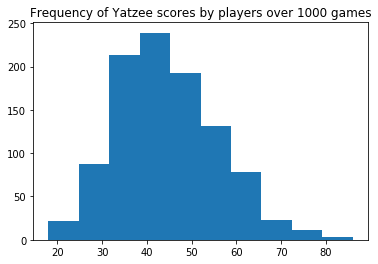

In [60]:
import matplotlib.pyplot as plt
plt.hist(scores)
plt.title("Frequency of Yatzee scores by players over 1000 games")
plt.show()

In [61]:
import numpy as np
print("Average score:", str(np.mean(scores)))
print("Minimum score:", str(np.min(scores)))
print("Maximum score:", str(np.max(scores)))

Average score: 44.564
Minimum score: 18.0
Maximum score: 86.0
